In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset_train = pd.read_csv("dataset/datatraining.txt", delimiter=',')

In [3]:
dataset_train

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.180000,27.272000,426.0,721.250000,0.004793,1
2,2015-02-04 17:51:59,23.150000,27.267500,429.5,714.000000,0.004783,1
3,2015-02-04 17:53:00,23.150000,27.245000,426.0,713.500000,0.004779,1
4,2015-02-04 17:54:00,23.150000,27.200000,426.0,708.250000,0.004772,1
5,2015-02-04 17:55:00,23.100000,27.200000,426.0,704.500000,0.004757,1
6,2015-02-04 17:55:59,23.100000,27.200000,419.0,701.000000,0.004757,1
7,2015-02-04 17:57:00,23.100000,27.200000,419.0,701.666667,0.004757,1
8,2015-02-04 17:57:59,23.100000,27.200000,419.0,699.000000,0.004757,1
9,2015-02-04 17:58:59,23.100000,27.200000,419.0,689.333333,0.004757,1
10,2015-02-04 18:00:00,23.075000,27.175000,419.0,688.000000,0.004745,1


In [4]:
rows = 8143
training_set = dataset_train.iloc[:, 1:].values

In [5]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0, 1))
training_set = sc.fit_transform(training_set)

In [6]:
X_train = []
y_train = []

for i in range(60, rows):
    X_train.append(training_set[i-60:i, :])
    y_train.append(training_set[i, :])

X_train, y_train = np.array(X_train), np.array(y_train)    

In [7]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))

In [8]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

Using TensorFlow backend.


In [9]:
regressor = Sequential()

regressor.add(LSTM(70, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))

regressor.add(LSTM(120, return_sequences=True))
regressor.add(Dropout(0.15))

regressor.add(LSTM(120, return_sequences=False))
regressor.add(Dropout(0.15))

regressor.add(Dense(X_train.shape[2]))

regressor.compile('adam', loss='mean_squared_error')

In [10]:
regressor.fit(X_train, y_train, batch_size=46, epochs=25)

Epoch 1/25
8083/8083 [==============================] - 45s 6ms/step - loss: 0.0091
Epoch 2/25
8083/8083 [==============================] - 40s 5ms/step - loss: 0.0039
Epoch 3/25
8083/8083 [==============================] - 45s 6ms/step - loss: 0.0032
Epoch 4/25
8083/8083 [==============================] - 42s 5ms/step - loss: 0.0029
Epoch 5/25
8083/8083 [==============================] - 43s 5ms/step - loss: 0.0026
Epoch 6/25
8083/8083 [==============================] - 47s 6ms/step - loss: 0.0025
Epoch 7/25
8083/8083 [==============================] - 49s 6ms/step - loss: 0.0023
Epoch 8/25
8083/8083 [==============================] - 45s 6ms/step - loss: 0.0022
Epoch 9/25
8083/8083 [==============================] - 40s 5ms/step - loss: 0.0020
Epoch 10/25
8083/8083 [==============================] - 41s 5ms/step - loss: 0.0020
Epoch 11/25
8083/8083 [==============================] - 43s 5ms/step - loss: 0.0019
Epoch 12/25
8083/8083 [==============================] - 42s 5ms/step - lo

In [11]:
dataset_test = pd.read_csv("dataset/datatest.txt")
real = dataset_test.iloc[:, 1:].values

In [12]:
frames = [dataset_train, dataset_test]
dataset_total = pd.concat(frames, axis=0)
dataset_total

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.180000,27.272000,426.000000,721.250000,0.004793,1
2,2015-02-04 17:51:59,23.150000,27.267500,429.500000,714.000000,0.004783,1
3,2015-02-04 17:53:00,23.150000,27.245000,426.000000,713.500000,0.004779,1
4,2015-02-04 17:54:00,23.150000,27.200000,426.000000,708.250000,0.004772,1
5,2015-02-04 17:55:00,23.100000,27.200000,426.000000,704.500000,0.004757,1
6,2015-02-04 17:55:59,23.100000,27.200000,419.000000,701.000000,0.004757,1
7,2015-02-04 17:57:00,23.100000,27.200000,419.000000,701.666667,0.004757,1
8,2015-02-04 17:57:59,23.100000,27.200000,419.000000,699.000000,0.004757,1
9,2015-02-04 17:58:59,23.100000,27.200000,419.000000,689.333333,0.004757,1
10,2015-02-04 18:00:00,23.075000,27.175000,419.000000,688.000000,0.004745,1


In [13]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:]
inputs = inputs.iloc[:, 1:].values
inputs = sc.transform(inputs)

In [14]:
X_test = []

for i in range(60, 80):
    X_test.append(inputs[i-60:i])
    
X_test = np.array(X_test)   
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 6))

prediction = regressor.predict(X_test)
prediction = sc.inverse_transform(prediction)

In [15]:
real_CO2 = real[:20, 3]
predicted_CO2 = prediction[:, 3]

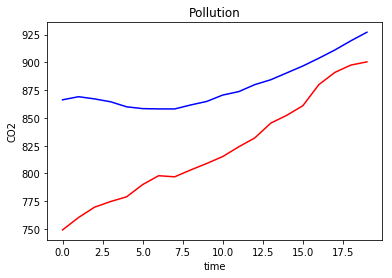

In [16]:
plt.plot(real_CO2, color='red')
plt.plot(predicted_CO2, color='blue')
plt.title("Pollution")
plt.ylabel("CO2")
plt.xlabel("time")
plt.show()

In [17]:
real_temperature = real[:20, 0]
predicted_temperature = prediction[:, 0]

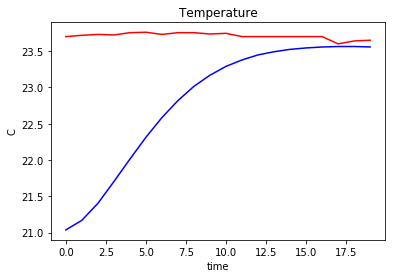

In [18]:
plt.plot(real_temperature, color='red')
plt.plot(predicted_temperature, color='blue')
plt.title("Temperature")
plt.ylabel("C")
plt.xlabel("time")
plt.show()

In [19]:
real_light = real[:20, 2]
predicted_light = prediction[:, 2]

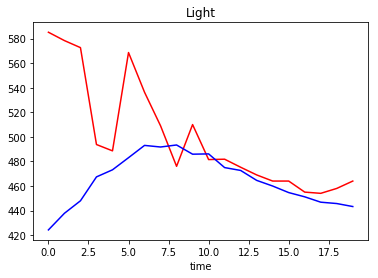

In [20]:
plt.plot(real_light, color='red')
plt.plot(predicted_light, color='blue')
plt.title("Light")
plt.xlabel("time")
plt.show()

In [21]:
real_humidity = real[:20, 1]
predicted_humidity = prediction[:, 1]

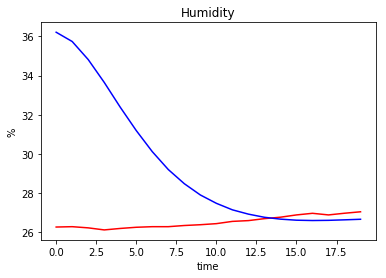

In [22]:
plt.plot(real_humidity, color='red')
plt.plot(predicted_humidity, color='blue')
plt.title("Humidity")
plt.ylabel("%")
plt.xlabel("time")
plt.show()

In [23]:
real_occupancy = real[:20, -1]
predicted_occupancy = prediction[:, -1]
predicted_occupancy = (predicted_occupancy > 0.5)

Accuracy: 20/20


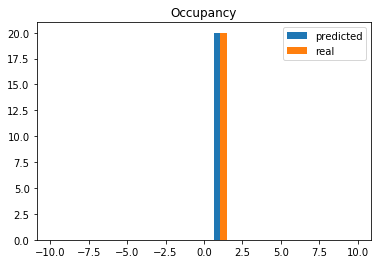

In [37]:
print("Accuracy: {}/20".format(list(real_occupancy-predicted_occupancy).count(0)))
bins = np.linspace(-10, 10, 20)
plt.hist([predicted_occupancy, real_occupancy], bins, label=['predicted', 'real'])
plt.title("Occupancy")
plt.legend()
plt.show()